In [74]:
import pandas as pd
import numpy as np
import pylab as mp1
mp1.rcParams['font.sans-serif'] = ['KaiTi']  
file_path=r"E:\数据表格\数据表格\《Python金融实战案例精粹（第2版）》的数据Excel文件\第3章\3.9 案例数据\4只创业板股票收盘价数据.xlsx"
data=pd.read_excel(file_path,sheet_name='Sheet1',index_col='日期 ')

In [13]:
data.isnull().any(axis=0)

宁德时代    False
迈瑞医疗    False
华大基因    False
欧普康视    False
dtype: bool

In [24]:
data_ev_pc=data.pct_change()

In [21]:
data.loc['2021-09-30']/data.loc['2019-01-02']-1

宁德时代    6.137252
迈瑞医疗    2.713818
华大基因    0.434590
欧普康视    1.171809
dtype: float64

In [25]:
data_ev_pc.cov()

,宁德时代,迈瑞医疗,华大基因,欧普康视
宁德时代,0.000969,0.00030,0.000273,0.000285
迈瑞医疗,0.000300,0.00072,0.000300,0.000440
华大基因,0.000273,0.00030,0.000911,0.000339
欧普康视,0.000285,0.00044,0.000339,0.001679


In [27]:
data_ev_pc.corr()

,宁德时代,迈瑞医疗,华大基因,欧普康视
宁德时代,1.000000,0.358858,0.290170,0.223064
迈瑞医疗,0.358858,1.000000,0.370167,0.400355
华大基因,0.290170,0.370167,1.000000,0.274246
欧普康视,0.223064,0.400355,0.274246,1.000000


In [33]:
stoc_value=data.mul(10000)
stoc_value

,宁德时代,迈瑞医疗,华大基因,欧普康视
日期,,,,
2019-01-02,736600.0,1037800.0,610000.0,376000.0
2019-01-03,738300.0,1013200.0,603700.0,380500.0
2019-01-04,769600.0,1015800.0,603400.0,399000.0
2019-01-07,774200.0,1017300.0,611900.0,402300.0
2019-01-08,793300.0,995000.0,599000.0,399100.0
...,...,...,...,...
2021-09-24,4999800.0,3750000.0,919200.0,798900.0
2021-09-27,5135000.0,3786000.0,902200.0,814300.0
2021-09-28,5004300.0,3800000.0,854600.0,812700.0


<Axes: xlabel='日期 '>

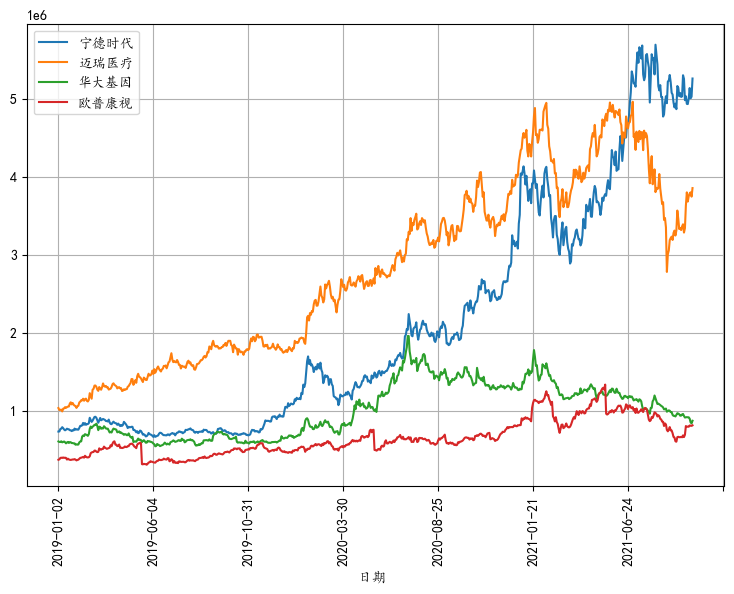

In [37]:
stoc_value.plot(rot=90,figsize=(9,6),grid=True)

In [62]:
cost=data.loc['2019-01-02']
cost=cost.sum()
cost=cost*10000
cost

2760400.0

In [60]:
stoc_value_tol=stoc_value.sum(axis=1)
# stoc_pro=stoc_value_tol-cost*10000
# stoc_pro

2019-01-02   NaN
2019-01-03   NaN
2019-01-04   NaN
2019-01-07   NaN
2019-01-08   NaN
              ..
2021-09-30   NaN
华大基因         NaN
宁德时代         NaN
欧普康视         NaN
迈瑞医疗         NaN
Length: 673, dtype: float64

In [68]:
sto_pro=stoc_value_tol-cost
sto_pro

日期 
2019-01-02          0.0
2019-01-03     -24700.0
2019-01-04      27400.0
2019-01-07      45300.0
2019-01-08      26000.0
                ...    
2021-09-24    7707500.0
2021-09-27    7877100.0
2021-09-28    7711200.0
2021-09-29    7661600.0
2021-09-30    8042800.0
Length: 669, dtype: float64

<Axes: xlabel='日期 '>

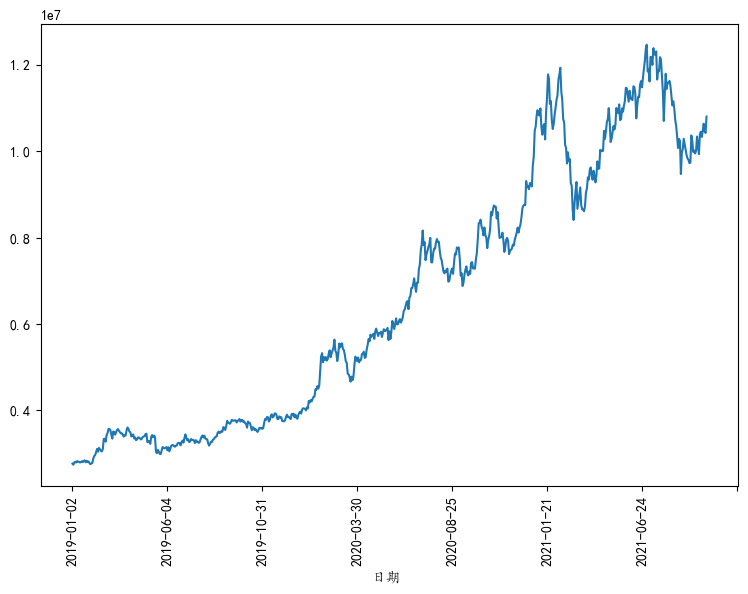

In [43]:
stoc_value_tol.plot(rot=90,figsize=(9,6))

<Axes: xlabel='日期 '>

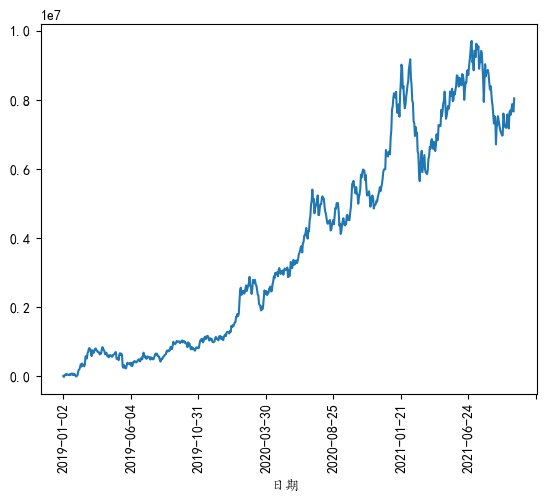

In [71]:
sto_pro.plot(rot=90)

In [72]:
cost=data.cumsum()
cost=cost*100
cost

,宁德时代,迈瑞医疗,华大基因,欧普康视
日期,,,,
2019-01-02,7366.0,10378.0,6100.0,3760.0
2019-01-03,14749.0,20510.0,12137.0,7565.0
2019-01-04,22445.0,30668.0,18171.0,11555.0
2019-01-07,30187.0,40841.0,24290.0,15578.0
2019-01-08,38120.0,50791.0,30280.0,19569.0
...,...,...,...,...
2021-09-24,13965650.0,18504014.0,6683050.0,4318286.0
2021-09-27,14017000.0,18541874.0,6692072.0,4326429.0
2021-09-28,14067043.0,18579874.0,6700618.0,4334556.0


In [79]:
data_arr=np.array(data)

array([[ 73.66, 103.78,  61.  ,  37.6 ],
       [ 73.83, 101.32,  60.37,  38.05],
       [ 76.96, 101.58,  60.34,  39.9 ],
       ...,
       [500.43, 380.  ,  85.46,  81.27],
       [502.51, 374.5 ,  84.26,  80.93],
       [525.73, 385.42,  87.51,  81.66]])

In [92]:
one=np.ones_like(np.array(data)).cumsum(axis=0)*100
price=one*np.array(data)

<Axes: xlabel='日期 '>

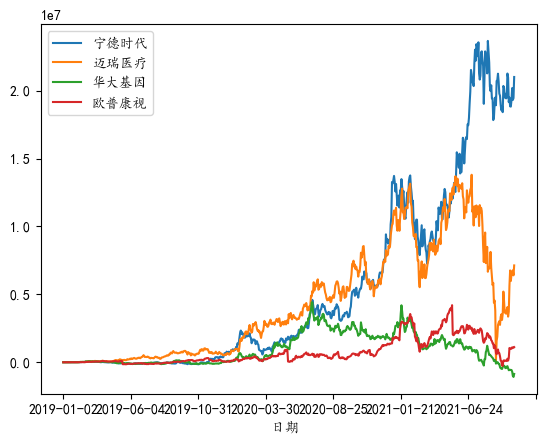

In [96]:
ev_pro=price-cost
ev_pro.plot()

<Axes: xlabel='日期 '>

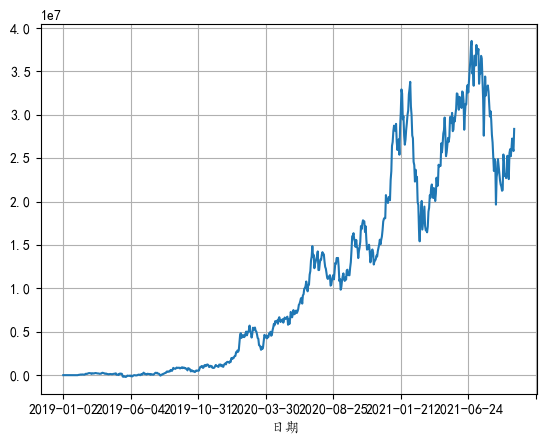

In [99]:
ev_pro.sum(axis=1).plot(grid=True)